In [15]:
import numpy as np # librarys & packages 
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
class DataFrameTransform:
    def __init__(self, df):
        self.df = df

    @staticmethod
    def impute_mean(df, column_name):
        if column_name in df.columns and df[column_name].dtype in [np.float64, np.int64]:
            mean_value = df[column_name].mean()
            df = df.copy()
            df.loc[df[column_name].isna(), column_name] = mean_value
            print(f"Imputed mean value {mean_value:.2f} into null values of '{column_name}'")
        return df

    @staticmethod
    def impute_median(df, column_name):
        if column_name in df.columns and df[column_name].dtype in [np.float64, np.int64]:
            median_value = df[column_name].median()
            df = df.copy()
            df.loc[df[column_name].isna(), column_name] = median_value
            print(f"Imputed median value {median_value:.2f} into null values of '{column_name}'")
        return df

    @staticmethod
    def impute_mode(df, column_name):
        if column_name in df.columns:
            mode_value = df[column_name].mode()
            if not mode_value.empty:
                df = df.copy()
                df.loc[df[column_name].isna(), column_name] = mode_value[0]
                print(f"Imputed mode value '{mode_value[0]}' into null values of '{column_name}'")
        return df

    def log_tf(self, column_name):
        if column_name in self.df.columns and (self.df[column_name] >= 0).all():
            self.df[column_name] = self.df[column_name].map(lambda i: np.log(i + 1))
            print(f"Applied log transformation to '{column_name}'.")
            sns.histplot(self.df[column_name], kde=True)
            plt.title(f"Log Transform of {column_name}")
            plt.xlabel(column_name)
            plt.ylabel("Frequency")
            plt.show()
        else:
            print(f"Cannot apply log transformation to '{column_name}'. Ensure there are no negative values.")

    def sqrt_tf(self, column_name):
        if column_name in self.df.columns and (self.df[column_name] >= 0).all():
            self.df[column_name] = self.df[column_name].map(lambda i: np.sqrt(i))
            print(f"Applied square root transformation to '{column_name}'.")
            sns.histplot(self.df[column_name], kde=True)
            plt.title(f"Square Root Transform of {column_name}")
            plt.xlabel(column_name)
            plt.ylabel("Frequency")
            plt.show()
        else:
            print(f"Cannot apply square root transformation to '{column_name}'. Ensure all values are non-negative.")

    def bxcx_tf(self, column_name):
        if column_name in self.df.columns and (self.df[column_name] > 0).all():
            transformed, _ = stats.boxcox(self.df[column_name])
            self.df[column_name] = transformed
            print(f"Applied Box-Cox transformation to '{column_name}'.")
            sns.histplot(self.df[column_name], kde=True)
            plt.title(f"Box-Cox Transform of {column_name}")
            plt.xlabel(column_name)
            plt.ylabel("Frequency")
            plt.show()
        else:
            print(f"Cannot apply Box-Cox transformation to '{column_name}'. Ensure all values are positive.")

    def yeoj_tf(self, column_name):
        if column_name in self.df.columns:
            transformed, _ = stats.yeojohnson(self.df[column_name])
            self.df[column_name] = transformed
            print(f"Applied Yeo-Johnson transformation to '{column_name}'.")
            sns.histplot(self.df[column_name], kde=True)
            plt.title(f"Yeo-Johnson Transform of {column_name}")
            plt.xlabel(column_name)
            plt.ylabel("Frequency")
            plt.show()
        else:
            print(f"Cannot apply Yeo-Johnson transformation to '{column_name}'.")

In [39]:
class DataTransform: # .csv file doesn't save the pd dtypes so need to run the DataTransform every time when loading. 
    def __init__(self, df):
        if not isinstance(df, pd.DataFrame):
            raise ValueError("Input must be a Pandas DataFrame.")
        self.df = df

    def change_dtypes(self, dtype_dict):
        try:
            for column, dtype in dtype_dict.items():
                if column in self.df.columns:
                    if dtype == "datetime64":
                        self.df[column] = pd.to_datetime(self.df[column], errors='coerce')
                    elif dtype == "boolean":
                        self.df[column] = self.df[column].map({'y': True, 'n': False})
                    else:
                        self.df[column] = self.df[column].astype(dtype, errors='ignore')
                else:
                    raise KeyError(f"Column '{column}' not found in DataFrame.")
            return self.df
        except Exception as e:
            raise RuntimeError(f"Error whilst changing datatypes: {e}")

if __name__ == "__main__":
    df_og = pd.read_csv("/Users/max/coding_resources/finance_loan_project/flp_df/flp_df3_imputed.csv")

    transformer = DataTransform(df_og)

    dtype_dict = {
        "id": "int64",
        "member_id": "int64",
        "loan_amount": "float64",
        "funded_amount": "float64",
        "funded_amount_inv": "float64",
        "term": "category",
        "int_rate": "float64",
        "instalment": "float64",
        "grade": "category",
        "sub_grade": "category",
        "employment_length": "category",
        "home_ownership": "category",
        "annual_inc": "float64",
        "verification_status": "category",
        "issue_date": "datetime64",
        "loan_status": "category",
        "payment_plan": "bool",
        "purpose": "category",
        "dti": "float64",
        "delinq_2yrs": "int64",
        "earliest_credit_line": "datetime64",
        "inq_last_6mths": "int64",
        "open_accounts": "int64",
        "total_accounts": "int64",
        "out_prncp": "float64",
        "out_prncp_inv": "float64",
        "total_payment": "float64",
        "total_payment_inv": "float64",
        "total_rec_prncp": "float64",
        "total_rec_int": "float64",
        "total_rec_late_fee": "float64",
        "recoveries": "float64",
        "collection_recovery_fee": "float64",
        "last_payment_date": "datetime64",
        "last_payment_amount": "float64",
        "last_credit_pull_date": "datetime64",
        "collections_12_mths_ex_med": "category",
        "policy_code": "int64",
        "application_type": "category"
    }

    df_t4 = transformer.change_dtypes(dtype_dict)

    print("\nTransformed DataFrame dtypes:\n")
    dtype_df = pd.DataFrame({"Columns" : df_t4.columns, "Dtype" : df_t4.dtypes}).reset_index(drop=True)
    print(dtype_df.sort_values("Columns").reset_index(drop=True))


Transformed DataFrame dtypes:

                       Columns           Dtype
0                   annual_inc         float64
1             application_type        category
2      collection_recovery_fee         float64
3   collections_12_mths_ex_med        category
4                  delinq_2yrs           int64
5                          dti         float64
6         earliest_credit_line  datetime64[ns]
7            employment_length        category
8                funded_amount         float64
9            funded_amount_inv         float64
10                       grade        category
11              home_ownership        category
12                          id           int64
13              inq_last_6mths           int64
14                  instalment         float64
15                    int_rate         float64
16                  issue_date  datetime64[ns]
17       last_credit_pull_date  datetime64[ns]
18         last_payment_amount         float64
19           last_payment_da

In [40]:
skewness = df_t4.skew(axis=0, numeric_only=True) # use inbult skew function. 

column_skew = skewness.reset_index() 
column_skew.columns = ["Column", "Skewness"]

df_ss = column_skew.sort_values(by="Skewness", ascending=False).reset_index(drop=True) # order by ascending. 

print(df_ss)

"""
Here I can see the skew of the orignal un-transformed df and use this as a reference point,
to check the reduction in skew that each transformation has on each column. 

"""


                     Column    Skewness
0              payment_plan  232.875503
1   collection_recovery_fee   27.636843
2                recoveries   14.589793
3        total_rec_late_fee   13.184305
4                annual_inc    8.711831
5               delinq_2yrs    5.370002
6            inq_last_6mths    3.248918
7       last_payment_amount    2.499381
8                        id    2.370336
9             out_prncp_inv    2.356848
10                out_prncp    2.356426
11                member_id    2.205422
12            total_rec_int    2.204322
13            total_payment    1.267891
14          total_rec_prncp    1.261015
15        total_payment_inv    1.256197
16            open_accounts    1.059282
17               instalment    0.996981
18            funded_amount    0.869922
19        funded_amount_inv    0.813927
20              loan_amount    0.805259
21           total_accounts    0.779014
22                 int_rate    0.433193
23                      dti    0.189420


'\nHere I can see the skew of the orignal un-transformed df and use this as a reference point,\nto check the reduction in skew that each transformation has on each column. \n\n'

In [41]:
class PlotterMini: # mini verison of plotter Class with just histogram. 
    def __init__(self, dataframe, default_palette="viridis"):
        self.dataframe = dataframe
        self.color_palette = sns.color_palette(default_palette)
        sns.set_style("whitegrid")

    def histogram(self, column, figsize=(8, 6), bins=25, palette=None): 
        plt.figure(figsize=figsize)
        sns.histplot(data=self.dataframe, x=column, bins=bins, kde=True, 
                     palette=palette or self.color_palette)
        plt.title(f"Histogram of {column}")
        plt.show()

og_df_to_plot = PlotterMini(df_t4)

    

In [36]:
df_t4_transform = df_t4.copy() # create a copy of the og df to perform transformations on. 

skewplotter = DataFrameTransform(df_t4_transform) # create a class instance to perform the transformations on the df copy. 

# I can refresh this command to reset the df copy back to orignal if I need to perform new transformations on same column, and need the og data. 

 List of columns needing transformation over self set threshold of 2 / -2 skew. 
 Can ignore payment plan as it is a bool. - 

"collection_recovery_fee",
"recoveries",
"total_rec_late_fee",
"annual_inc",
"delinq_2yrs",
"inq_last_6mths",
"last_payment_amount",
"id",
"out_prncp_inv",
"out_prncp",
"member_id",
"total_rec_int",

In [42]:
skewness2 = df_t4_transform.skew(axis=0, numeric_only=True)

column_skew2 = skewness2.reset_index()
column_skew2.columns = ["Column", "Skewness"]

df_s2 = column_skew2.sort_values(by="Skewness", ascending=False).reset_index(drop=True)

print(df_s2) # shows skew after transformations, as transformations are Class instances and done in place, each one will periodically update the df when commands refreshed. 

                     Column    Skewness
0              payment_plan  232.875503
1   collection_recovery_fee   27.636843
2                recoveries   14.589793
3        total_rec_late_fee   13.184305
4                annual_inc    8.711831
5               delinq_2yrs    5.370002
6            inq_last_6mths    3.248918
7       last_payment_amount    2.499381
8                        id    2.370336
9             out_prncp_inv    2.356848
10                out_prncp    2.356426
11                member_id    2.205422
12            total_rec_int    2.204322
13            total_payment    1.267891
14          total_rec_prncp    1.261015
15        total_payment_inv    1.256197
16            open_accounts    1.059282
17               instalment    0.996981
18            funded_amount    0.869922
19        funded_amount_inv    0.813927
20              loan_amount    0.805259
21           total_accounts    0.779014
22                 int_rate    0.433193
23                      dti    0.189420


/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_31823/825180314.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=self.dataframe, x=column, bins=bins, kde=True,


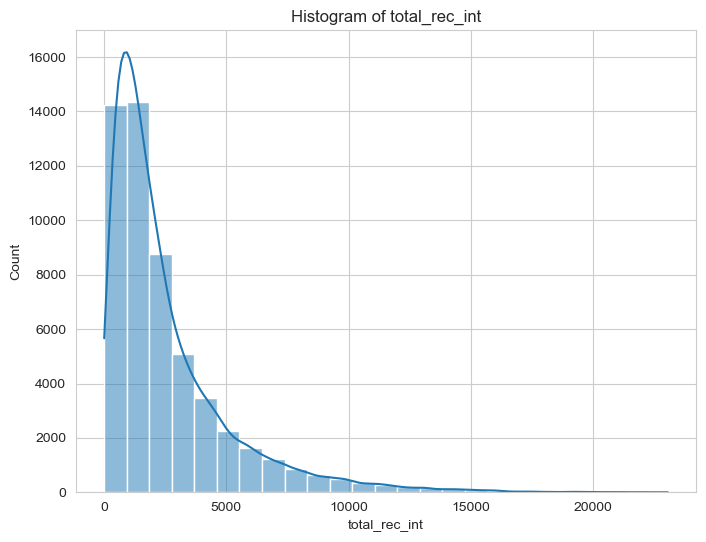

'\nHere plot the histogram of the columns of the df before any transformations\nand compare them to the different data transformed histograms.\n\n'

In [43]:
og_df_to_plot.histogram("total_rec_int") 

"""
Here plot the histogram of the columns of the df before any transformations
and compare them to the different data transformed histograms.

"""

Applied log transformation to 'total_rec_int'.


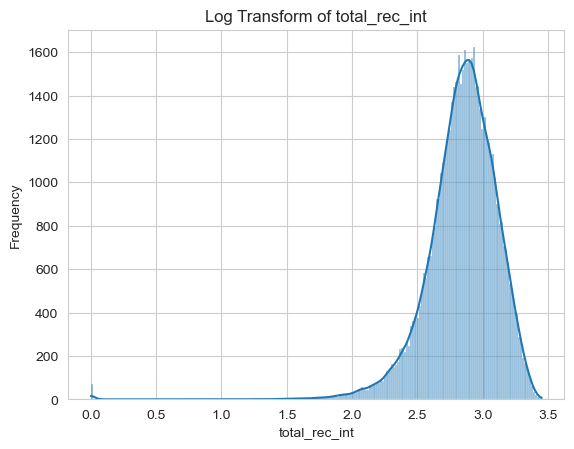

In [ ]:
skewplotter.log_tf("total_rec_int") 

Applied square root transformation to 'total_rec_int'.


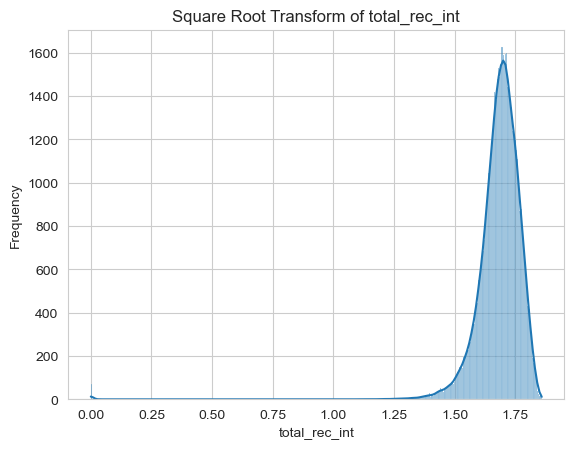

In [31]:
skewplotter.sqrt_tf("total_rec_int")

In [32]:
skewplotter.bxcx_tf("total_rec_int")

Cannot apply Box-Cox transformation to 'total_rec_int'. Ensure all values are positive.


Applied Yeo-Johnson transformation to 'total_rec_int'.


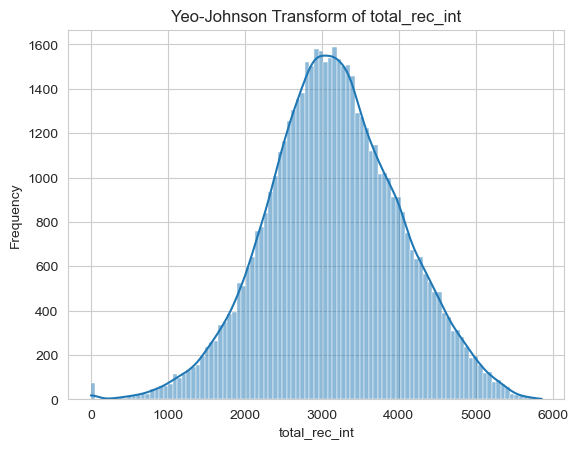

In [ ]:
skewplotter.yeoj_tf("total_rec_int")

In every single case the transformation that provided the biggest reduction of skew was Yeo-Johnson. 
As the task was to apply the transformation that provided the biggest reduction I have chosen to use 
Yeo-Johnson in every case, above the 2 skew threshold. My reasonings are included in pages document I will
upload to mu github. 